# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0, 0.5, 'Total Bedrooms')

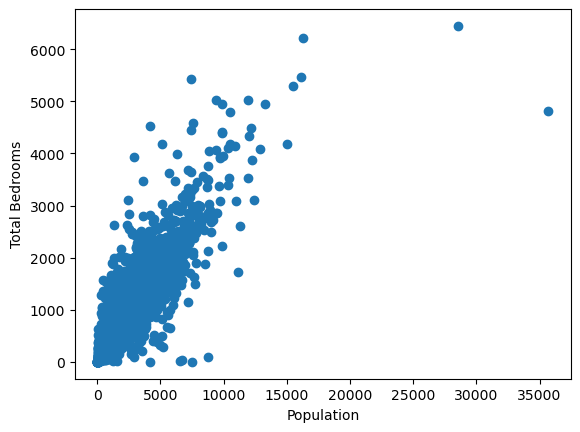

In [3]:
plt.scatter(df.population,df.total_bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
value_to_fill = df['total_bedrooms'].mode()[0]
df['total_bedrooms'].fillna(value_to_fill,inplace=True)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df.shape

(20640, 10)

In [8]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
dinf = df.isin([np.inf, -np.inf])
dinf.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [16]:
pop = df['population']
bedrooms = df['total_bedrooms']

pop_np = pop.to_numpy()
bedrooms_np = bedrooms.to_numpy()

pop_np.shape,bedrooms_np.shape

((20640,), (20640,))

In [18]:
sklearn_model = LR().fit(pop_np.reshape(20640,1), bedrooms_np)
sklearn_bedrooms_predictions = sklearn_model.predict(pop_np.reshape((20640,1)))
sklearn_bedrooms_predictions.shape

(20640,)

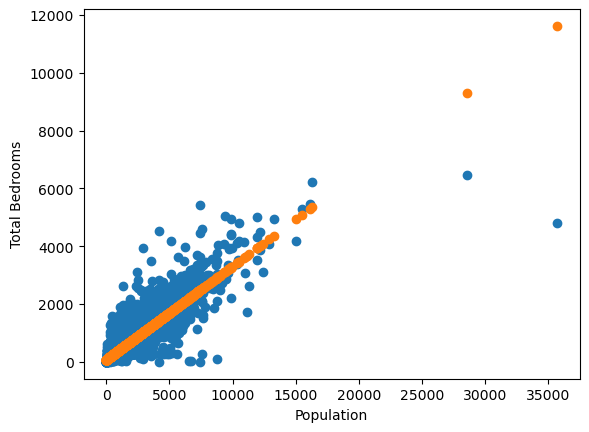

In [19]:
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop,sklearn_bedrooms_predictions)

In [20]:
pre_df = pd.DataFrame({'Populations':pop,
                      'Bedrooms':bedrooms,
                      'Sklearn Bedrooms Predictions':sklearn_bedrooms_predictions})
pre_df

,Populations,Bedrooms,Sklearn Bedrooms Predictions
0,322.0,129.0,178.377696
1,2401.0,1106.0,850.805945
2,496.0,190.0,234.655962
3,558.0,235.0,254.709137
4,565.0,280.0,256.973206
...,...,...,...
20635,845.0,374.0,347.535933
20636,356.0,150.0,189.374598
20637,1007.0,485.0,399.932939
20638,741.0,409.0,313.898348


In [22]:
def get_pre(model,x):
    a_hat = model['a_hat']
    b_hat = model['b_hat']
    
    return a_hat + b_hat * x



In [26]:
test_model = {'a_hat':1, 'b_hat':1/2}
test_x = np.array([1,2,3])
get_pre(test_model,test_x)


array([1.5, 2. , 2.5])

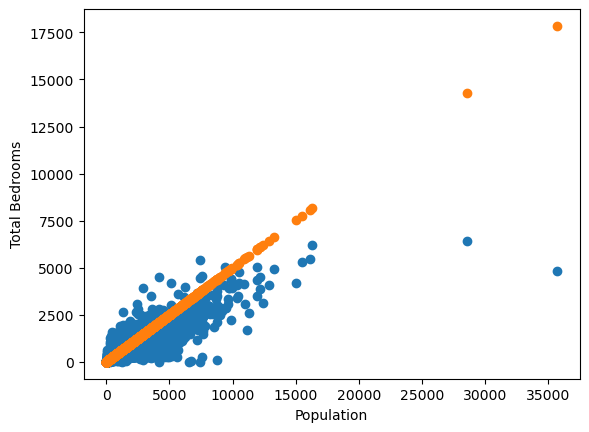

In [27]:
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop,get_pre(test_model, pop_np))

In [33]:
def mse(y, y_pre):
    n = len(y)
    return np.sum(np.square(y-y_pre)) / n

def mae(y, y_pre):
    n = len(y)
    return np.sum(np.abs(y-y_pre)) / n
    

In [34]:
mse1 = mse(get_pre(test_model, pop_np), bedrooms)
mse1

114104.11145833334

In [35]:
mae1 = mae(get_pre(test_model, pop_np), bedrooms)
mae1

215.97538759689922

In [36]:
def get_best_model(x,y):
    x_bar = np.average(x)
    y_bar = np.average(y)
    
    top = np.sum((x - x_bar)*(y - y_bar))
    bot = np.sum((x - x_bar)**2)
    b_hat = top/bot
    a_hat = y_bar - b_hat*x_bar
    model1 = {'a_hat':a_hat,'b_hat':b_hat}
    return model1

    

In [37]:
best_model = get_best_model(pop_np,bedrooms_np)
best_model

{'a_hat': 74.23055951903484, 'b_hat': 0.3234383115239265}

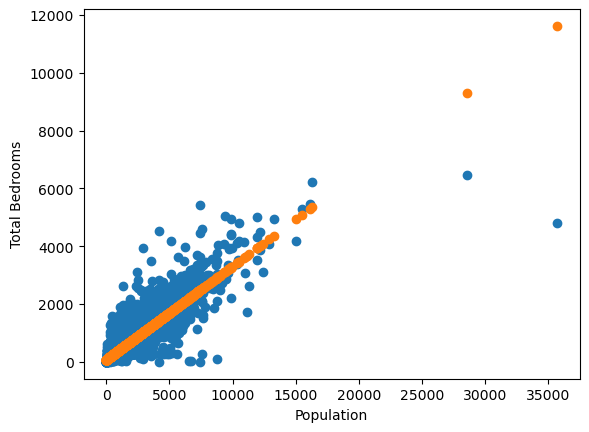

In [38]:
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop,get_pre(best_model, pop_np))

In [43]:
pre_df['Our Model Predictions'] = get_pre(best_model, pop_np)
pre_df

,Populations,Bedrooms,Sklearn Bedrooms Predictions,Our Model Predictions
0,322.0,129.0,178.377696,178.377696
1,2401.0,1106.0,850.805945,850.805945
2,496.0,190.0,234.655962,234.655962
3,558.0,235.0,254.709137,254.709137
4,565.0,280.0,256.973206,256.973206
...,...,...,...,...
20635,845.0,374.0,347.535933,347.535933
20636,356.0,150.0,189.374598,189.374598
20637,1007.0,485.0,399.932939,399.932939
20638,741.0,409.0,313.898348,313.898348


In [42]:
mae(pre_df['Bedrooms'],
    pre_df['Our Model Predictions'])


120.32375345366938